Epoch 100/3000, Loss: 47609.98046875
Epoch 200/3000, Loss: 36840.70703125
Epoch 300/3000, Loss: 28772.986328125
Epoch 400/3000, Loss: 22844.7734375
Epoch 500/3000, Loss: 18615.5625
Epoch 600/3000, Loss: 15702.5986328125
Epoch 700/3000, Loss: 13774.3095703125
Epoch 800/3000, Loss: 11014.2919921875
Epoch 900/3000, Loss: 9178.0361328125
Epoch 1000/3000, Loss: 7852.98779296875
Epoch 1100/3000, Loss: 6806.12353515625
Epoch 1200/3000, Loss: 5967.59033203125
Epoch 1300/3000, Loss: 5356.75244140625
Epoch 1400/3000, Loss: 4883.52734375
Epoch 1500/3000, Loss: 4516.03857421875
Epoch 1600/3000, Loss: 4223.314453125
Epoch 1700/3000, Loss: 3991.843017578125
Epoch 1800/3000, Loss: 3805.791015625
Epoch 1900/3000, Loss: 3652.160888671875
Epoch 2000/3000, Loss: 3526.95068359375
Epoch 2100/3000, Loss: 3422.1591796875
Epoch 2200/3000, Loss: 3333.316162109375
Epoch 2300/3000, Loss: 3259.649658203125
Epoch 2400/3000, Loss: 3196.46337890625
Epoch 2500/3000, Loss: 3143.205322265625
Epoch 2600/3000, Loss: 3093

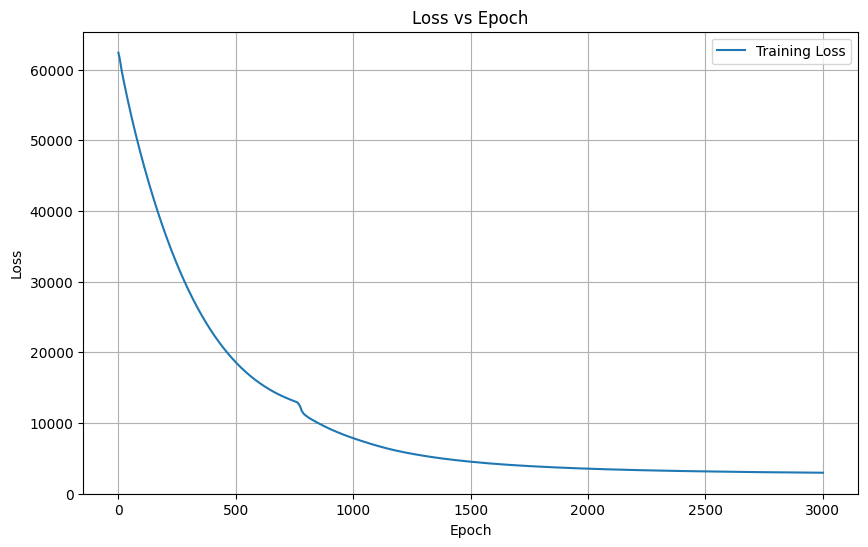

Mean Absolute Error (MAE): 41.2192
Root Mean Squared Error (RMSE): 55.4864
R-squared (R²): 0.7198


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import pandas as pd
import numpy as np

# Load the data
data = pd.read_csv('/content/drive/MyDrive/DUMPY/imputed_city_hour_scaled.txt')

# Filter for City == Delhi
data = data[data['City'] == 'Delhi']

# Drop irrelevant columns
data = data.drop(['City', 'Datetime', 'AQI_Bucket'], axis=1)

# Split inputs and output
X = data[['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3', 'Benzene', 'Toluene', 'Xylene']].values
y = data['AQI'].values

# Apply JL Lemma: Dimensionality Reduction
random_projection_matrix = np.random.normal(size=(12, 6)) / np.sqrt(6)
X_reduced = np.dot(X, random_projection_matrix)


# Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Define ANN
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.layer1 = nn.Linear(6, 32)
        self.layer2 = nn.Linear(32, 32)
        self.output = nn.Linear(32, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.layer1(x))
        x = self.tanh(self.layer2(x))
        x = self.output(x)
        return x

# Initialize model, loss, and optimizer
model = ANN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
import matplotlib.pyplot as plt

# Initialize lists to store loss values
loss_values = []

# Train model
epochs = 3000
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    predictions = model(X_train_tensor)
    loss = criterion(predictions, y_train_tensor)
    loss.backward()
    optimizer.step()

    # Save loss for plotting
    loss_values.append(loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item()}")

# Plot loss vs epoch
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), loss_values, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

# Evaluate model
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor).numpy()
    y_test_np = y_test_tensor.numpy()

    # Calculate metrics
    mae = mean_absolute_error(y_test_np, predictions)
    rmse = np.sqrt(mean_squared_error(y_test_np, predictions))
    r2 = r2_score(y_test_np, predictions)

    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")


In [ ]:
import os
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# /content/drive/MyDrive/DUMPY/imputed_city_hour_scaled.txt
# Load and preprocess data
data = pd.read_csv('/content/drive/MyDrive/DUMPY/imputed_city_hour_scaled.txt')

# Remove irrelevant columns
data = data.drop(['Datetime', 'AQI_Bucket'], axis=1)

# Split by city
cities = data['City'].unique()
models = {}
city_test_data = {}
city_random_matrix = {}
# Define model class
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.hidden1 = nn.Linear(input_dim, 64)
        self.hidden2 = nn.Linear(64, 32)
        self.output = nn.Linear(32, 1)
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.tanh(self.hidden1(x))
        x = self.tanh(self.hidden2(x))
        x = self.output(x)
        return x

def train_model(X_train, y_train, input_dim, city_name):
    model = ANNModel(input_dim)
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.01)
    max_epochs = 40000  # Set a maximum limit to prevent infinite loops
    min_loss_diff = 1  # Convergence criterion

    prev_loss = float('inf')  # Initialize with a high value
    for epoch in range(max_epochs):
        model.train()
        optimizer.zero_grad()
        predictions = model(X_train)
        loss = criterion(predictions, y_train)
        loss.backward()
        optimizer.step()

        # # Convergence check
        # if abs(prev_loss - loss.item()) < min_loss_diff:
        #     print(f"City: {city_name}, Converged at Epoch {epoch+1}, Loss: {loss.item()}")
        #     break

        # prev_loss = loss.item()

        # Logging
        if (epoch + 1) % 100 == 0:
            print(f"City: {city_name}, Epoch {epoch+1}, Loss: {loss.item()}")


            # Convergence check after 100 epoch
            if abs(prev_loss - loss.item()) < min_loss_diff:
                print(f"City: {city_name}, Converged at Epoch {epoch+1}, Loss: {loss.item()}")
                break

            prev_loss = loss.item()

    return model


# Process and train for each city
for city in cities:
    print(f"Processing city: {city}")
    city_data = data[data['City'] == city]

    # Split into features and target
    X = city_data.drop(['City', 'AQI'], axis=1).values
    y = city_data['AQI'].values

    # Apply JL Lemma for dimensionality reduction
    random_projection_matrix = np.random.normal(size=(X.shape[1], 6)) / np.sqrt(6)
    X_reduced = np.dot(X, random_projection_matrix)

    if len(X_reduced) < 10:
        print(f"Skipping city: {city} due to insufficient data.")
        continue
    X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

    # Convert to tensors
    X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
    y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

    # Train the model
    model = train_model(X_train_tensor, y_train_tensor, input_dim=6, city_name=city)

    # Save the model
    os.makedirs("models", exist_ok=True)
    torch.save(model.state_dict(), f"/content/drive/MyDrive/DUMPY/DSC_models/model_{city}.pth")
    models[city] = model
    city_test_data[city] = (X_test_tensor, y_test_tensor)
    city_random_matrix[city] = random_projection_matrix

# Evaluate combined model
combined_mse = 0
total_samples = 0

for city in cities:
    if city not in models:
        continue
    model = models[city]
    X_test_tensor, y_test_tensor = city_test_data[city]

    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
        combined_mse += mse * len(y_test_tensor)
        total_samples += len(y_test_tensor)

combined_mse /= total_samples
print(f"Combined Test Loss (MSE): {combined_mse:.4f}")


import pickle

# Save city_random_matrix to a pickle file
with open("/content/drive/MyDrive/DUMPY/city_random_matrix.pkl", "wb") as file:
    pickle.dump(city_random_matrix, file)

print("city_random_matrix saved as city_random_matrix.pkl")


# Evaluate combined model
combined_mse = 0
total_samples = 0

for city in cities:
    if city not in models:
        continue
    model = models[city]
    X_test_tensor, y_test_tensor = city_test_data[city]

    model.eval()
    with torch.no_grad():
        predictions = model(X_test_tensor)
        mse = mean_squared_error(y_test_tensor.numpy(), predictions.numpy())
        combined_mse += mse * len(y_test_tensor)
        total_samples += len(y_test_tensor)

combined_mse /= total_samples
print(f"Combined Test Loss (MSE): {combined_mse:.4f}")

Processing city: Aizawl
Skipping city: Aizawl due to insufficient data.
Processing city: Amaravati
City: Amaravati, Epoch 100, Loss: 5925.3583984375
City: Amaravati, Epoch 200, Loss: 3916.805419921875
City: Amaravati, Epoch 300, Loss: 3210.176513671875
City: Amaravati, Epoch 400, Loss: 3021.22314453125
City: Amaravati, Epoch 500, Loss: 2178.984619140625
City: Amaravati, Epoch 600, Loss: 1814.6114501953125
City: Amaravati, Epoch 700, Loss: 1566.0557861328125
City: Amaravati, Epoch 800, Loss: 1389.6126708984375
City: Amaravati, Epoch 900, Loss: 1241.930908203125
City: Amaravati, Epoch 1000, Loss: 1127.93017578125
City: Amaravati, Epoch 1100, Loss: 1035.2305908203125
City: Amaravati, Epoch 1200, Loss: 968.8785400390625
City: Amaravati, Epoch 1300, Loss: 915.4716186523438
City: Amaravati, Epoch 1400, Loss: 869.1197509765625
City: Amaravati, Epoch 1500, Loss: 831.7674560546875
City: Amaravati, Epoch 1600, Loss: 800.7777099609375
City: Amaravati, Epoch 1700, Loss: 773.3521728515625
City: Ama